# Описание данных

- **_Customer ID_**: Уникальный ID для каждого клиента
- **_Surname_**: Фамилия клиента
- **_Credit Score_**: Численное значение отражающее кредитный рейтинг клиента
- **_Geography_**: Страна, в которой проживает клиент
- **_Gender_**: Пол клиента
- **_Age_**: Возраст клиента
- **_Tenure_**: Стаж/Кол-во лет, в течении которых клиент пользуется услугами банка
- **_Balance_**: Остаток на счете клиента/Баланс клиента
- **_NumOfProducts_**: Кол-во продуктов банка, которыми пользуется клиент (например сберегательный счёт, кредитная карта и т.д.)
- **_HasCrCard_**: Есть ли у клиента банка кредитная карта
- **_IsActiveMember_**: Является ли клиент активным пользователем услуг банка
- **_EstimatedSalary_**: Предполагаемая зарплата клиента
- **_Exited_**: Отказался ли клиент от услуг (**_Target_**)

# Загрузка библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats

# EDA

In [3]:
sns.set(rc={'figure.figsize' : (9, 6)})
sns.color_palette("pastel")
sns.set_style("ticks") 

In [4]:
train_df = pd.read_csv('data/train.csv', index_col = 'id')

In [5]:
train_df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Сразу можно заметить, что в данных присутсвуют несколько номинативных признаков, а именно: "Geography", "Gender", "HasCrCard" и "IsActiveMember". Есть признак ID: "CustomerId". Его можно удалить, как и признак Surname, они не несут в себе какой-либо полезной информации.

In [6]:
train_df = train_df.drop(['CustomerId', 'Surname'], axis = 1)

### Кол-во уникальных значений признаков

In [7]:
train_df.nunique()

CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

### Пропущенные значения

Проверка данных на пропущенные значения - одно из самых важных действий в начале EDA.

In [8]:
train_df.isnull().sum() / len(train_df.isnull())

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

В наборе данных отсутствуют пропущенные значения. В случае, если бы они были, пришлось бы использовать один из способов для устранения пропущенных значений. Например заполнить пропуски средним значением по признаку или использовать медиану, а для номинативных признаков моду. В крайнем случае, если бы число пропусков было бы велико(>50%), пришлось бы отказаться от использования признака в исследовании или удалить строки с пропущенными значениями, но это привело бы к серьезной потере данных.

### Повторяющиеся наблюдения

Можно так же проверить есть ли в данных дублирующиеся значения:

In [9]:
print(f'Общее количество повторяющихся строк: {train_df.duplicated().sum()}')

Общее количество повторяющихся строк: 123


Похоже в наборе данных присутствуют 123 наблюдения дубликата. Их желательно удалить:

In [10]:
train_df = train_df.drop_duplicates()

### Типы данных признаков

In [11]:
train_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

### Основные описательные статистики о клиентах

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,164911.0,656.468914,80.091065,350.00,597.00,659.0,710.00,850.00
Age,164911.0,38.124278,8.865020,18.00,32.00,37.0,42.00,92.00
Tenure,164911.0,5.020599,2.806237,0.00,3.00,5.0,7.00,10.00
Balance,164911.0,55481.138955,62819.233625,0.00,0.00,0.0,119948.09,250898.09
NumOfProducts,164911.0,1.554420,0.547171,1.00,1.00,2.0,2.00,4.00
HasCrCard,164911.0,0.753916,0.430730,0.00,1.00,1.0,1.00,1.00
IsActiveMember,164911.0,0.497693,0.499996,0.00,0.00,0.0,1.00,1.00
EstimatedSalary,164911.0,112579.798396,50290.229424,11.58,74639.87,117948.0,155155.25,199992.48
Exited,164911.0,0.211684,0.408503,0.00,0.00,0.0,0.00,1.00


### Распределение возраста клиентов

Теперь можно построить распределение количественных признаков и Boxplot, что бы оценить наличие выбросов:

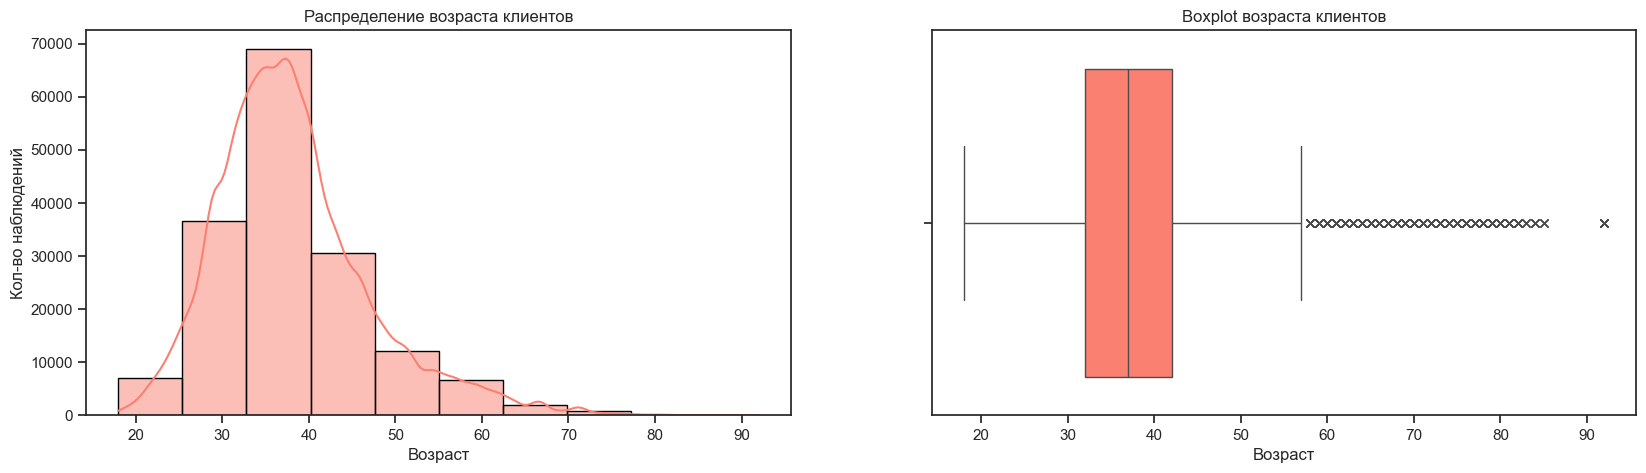

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(train_df['Age'], bins=10, kde=True, color='salmon', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Возраст')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение возраста клиентов')
sns.boxplot(x=train_df['Age'], flierprops={"marker": "x"}, boxprops={"facecolor": 'salmon'}, ax=ax[1])
ax[1].set_xlabel('Возраст')
ax[1].set_title('Boxplot возраста клиентов')
plt.show()

И по графику распределения и по графику Boxplot видно, что присутсвуют значительные отклонения в данных.

### Распределение баланса клиентов

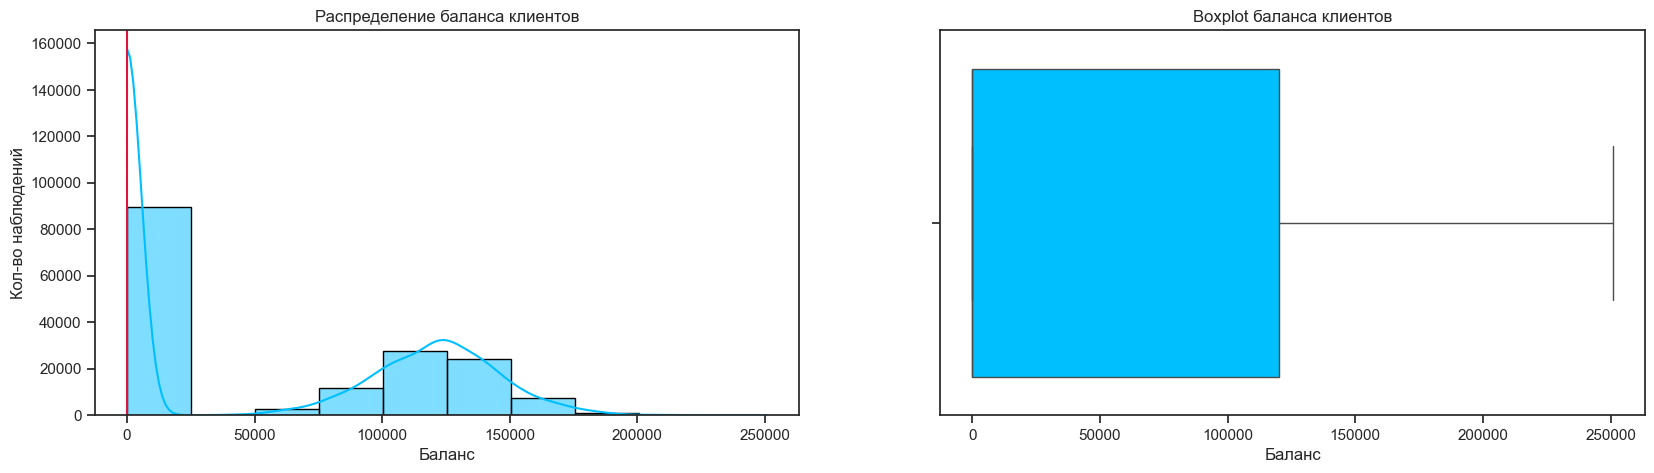

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(train_df['Balance'], bins=10, kde=True, color='deepskyblue', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Баланс')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение баланса клиентов')
ax[0].axvline(train_df['Balance'].median(),color='crimson',label=f"Median Balance {train_df['Balance'].median()}")
sns.boxplot(x=train_df['Balance'], flierprops={"marker": "x"}, boxprops={"facecolor": 'deepskyblue'}, ax=ax[1])
ax[1].set_xlabel('Баланс')
ax[1].set_title('Boxplot баланса клиентов')
plt.show()

Похоже, что у подавляющего большинства клиентов отсутсвуют средства на счете. На самом деле, это довольно интересная информация, ведь логически можно предположить, что клиенты без средств на счете более предрасположены к отказу от услуг банка. C другой стороны, возможно они используют счет для чего то другого, например для срочных переводов, а не для постоянного хранения денег.

Посмотрим на распределение баланса там где он >0 более детально:

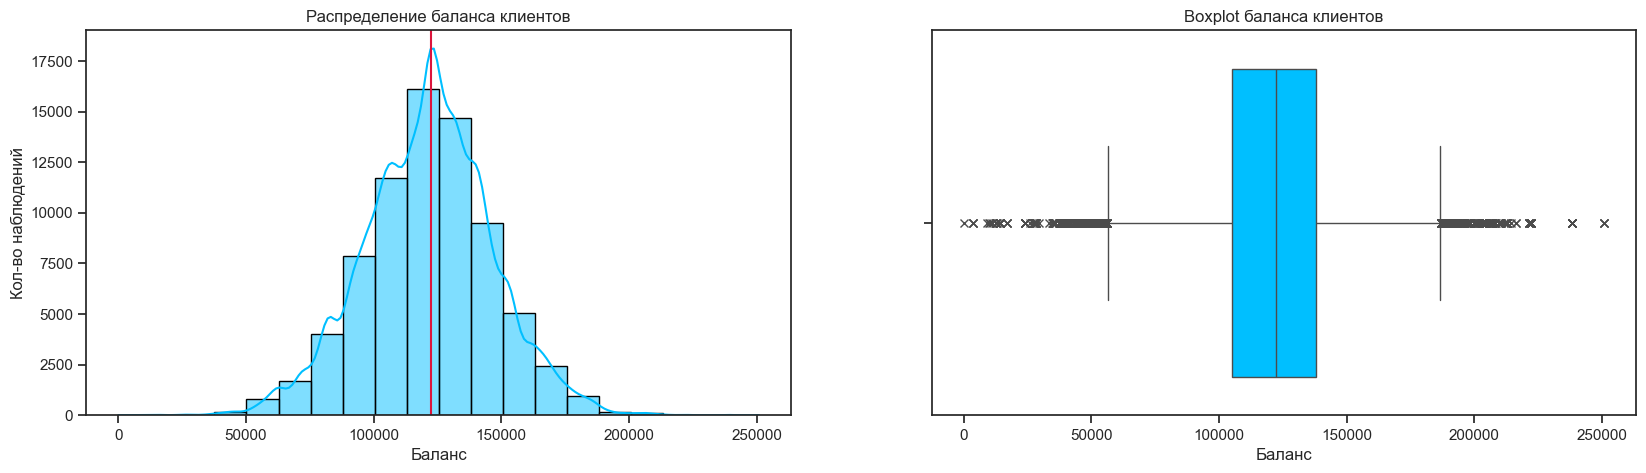

In [16]:
balance_not_null = train_df[train_df['Balance'] > 0]
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(balance_not_null['Balance'], bins=20, kde=True, color='deepskyblue', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Баланс')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение баланса клиентов')
ax[0].axvline(balance_not_null['Balance'].median(), color='crimson', label=f"Median Balance {balance_not_null['Balance'].median()}")
sns.boxplot(x=balance_not_null['Balance'], flierprops={"marker": "x"}, boxprops={"facecolor": 'deepskyblue'}, ax=ax[1])
ax[1].set_xlabel('Баланс')
ax[1].set_title('Boxplot баланса клиентов')
plt.show()

### Распределение крединтого рейтинга клиентов

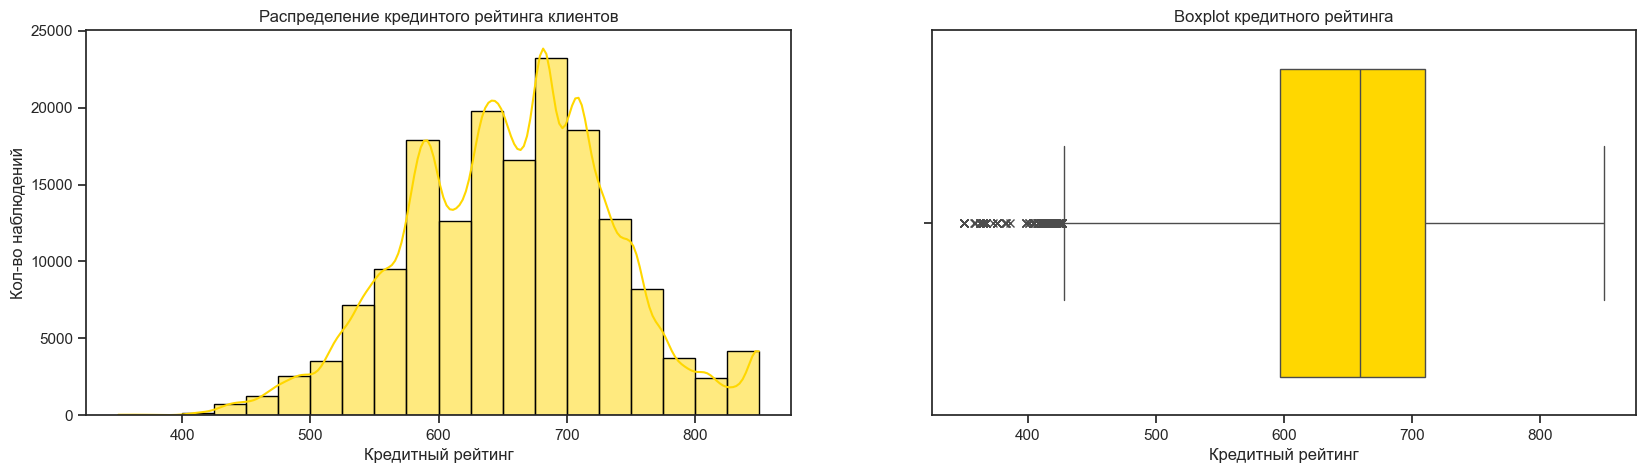

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(train_df['CreditScore'], bins=20, kde=True, color='gold', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Кредитный рейтинг')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение крединтого рейтинга клиентов')
sns.boxplot(x=train_df['CreditScore'], flierprops={"marker": "x"}, boxprops={"facecolor": 'gold'}, ax=ax[1])
ax[1].set_xlabel('Кредитный рейтинг')
ax[1].set_title('Boxplot кредитного рейтинга')
plt.show()

Исходя из гистограммы, можно сделать вывод, что у большинства клиентов кредитный рейтинг превышает 500 и находится на довольно высоком уровне.

### Распределение предполагаемой зарплаты клиентов

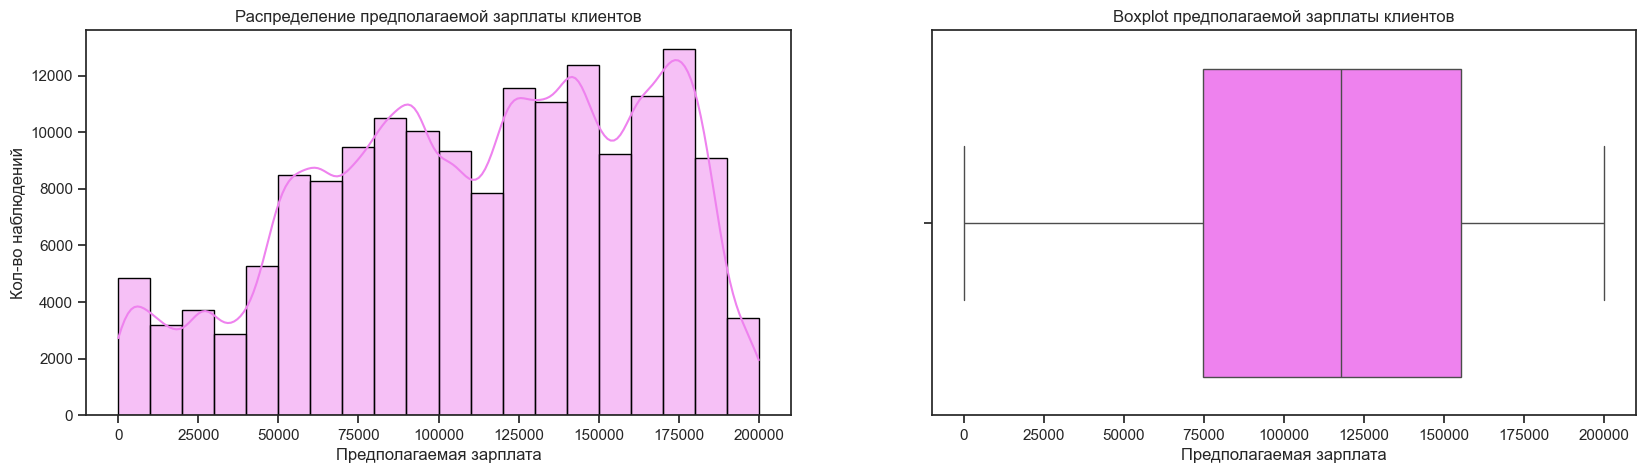

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(train_df['EstimatedSalary'], bins=20, kde=True, color='violet', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Предполагаемая зарплата')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение предполагаемой зарплаты клиентов')
sns.boxplot(x=train_df['EstimatedSalary'], flierprops={"marker": "x"}, boxprops={"facecolor": 'violet'}, ax=ax[1])
ax[1].set_xlabel('Предполагаемая зарплата')
ax[1].set_title('Boxplot предполагаемой зарплаты клиентов')
plt.show()

По графику заработной платы видно, что клиентами банка являются люди с совершенно разными уровнями дохода, при этом налюдения распределенны более менее равномерно. Интересно здесь то, что клиентами банка являются так же люди, у которых уровень заработной платы близок или равен 0(их меньшинство). Интересно, какой уровень крединтого доверия у них и хранят ли они вообще какие то средства на счете.

In [19]:
temp_df = train_df[train_df['EstimatedSalary'] < 100]
avg_credit_score = temp_df['CreditScore'].mean()
avg_balance = temp_df['Balance'].mean()

In [20]:
print(f'Средний значение крединтого рейтинга для тех у кого ЗП < 100: {avg_credit_score}')

Средний значение крединтого рейтинга для тех у кого ЗП < 100: 631.1875


In [21]:
print(f'Средний значение баланса для тех у кого ЗП < 100: {avg_balance}')

Средний значение баланса для тех у кого ЗП < 100: 111554.175


Это интересно, даже у тех, у кого минимальная заработная плата, имеются довольно большие сбережения на счете.

### Распределение стажа клиентов

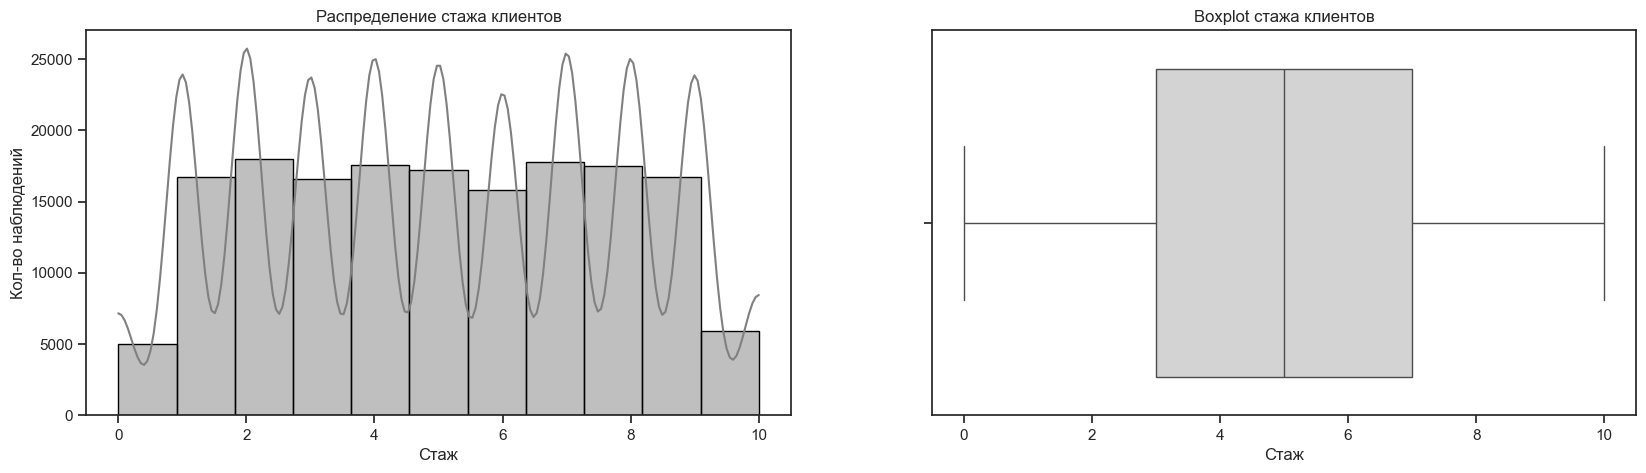

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(train_df['Tenure'], bins=11, kde=True, color='grey', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Стаж')
ax[0].set_ylabel('Кол-во наблюдений')
ax[0].set_title('Распределение стажа клиентов')
sns.boxplot(x=train_df['Tenure'], flierprops={"marker": "x"}, boxprops={"facecolor": 'lightgrey'}, ax=ax[1])
ax[1].set_xlabel('Стаж')
ax[1].set_title('Boxplot стажа клиентов')
plt.show()

Наблюдения распределены еще более равномерно, чем в случае с предполагаемой зарплатой.

### Столбчатая диаграмма пола в зависимости от страны проживания

Теперь можно рассмотреть признаки в контексте других признаков. Например Gender и Geography:

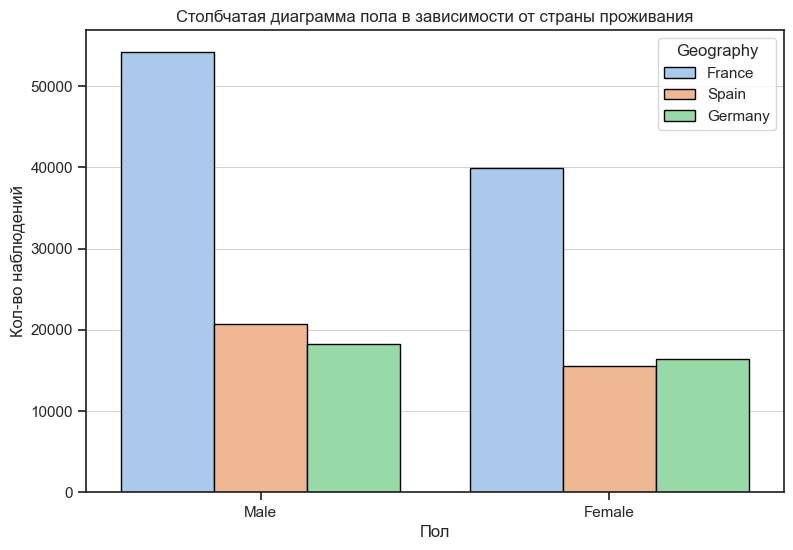

In [23]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Gender',
              hue='Geography',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Пол')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма пола в зависимости от страны проживания')
plt.show()

Сразу видно, что большинство клиентов банка проживают во Франции, как и мужчины, так и женщины. Испания и Германия делят второе место по кол-ву клиентов.

### Столбчатая диаграмма возрастных групп в зависимости от пола

Далее я создам временную переменную, что бы сгрупировать данные по возрасту и посмотрю какое кол-во клиентов в какой группе находится в зависимости от пола и страны проживания:

In [24]:
train_df['Age Group'] = (train_df["Age"]//20).astype('int').astype('category')

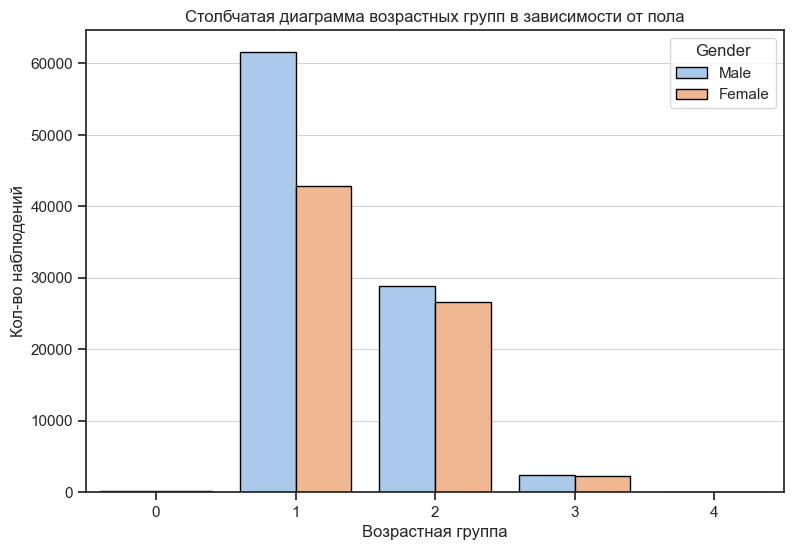

In [25]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Age Group',
              hue='Gender',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Возрастная группа')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма возрастных групп в зависимости от пола')
plt.show()

Мужчины и женщины распределились в примерно одинаковой пропорции в каждой группе. Большинство клиентов находятся в возрастном диапазоне от 30 до 50 лет, но это уже известно, ведь ранее была построенна гистограмма распределения возраста.

### Распределение таргета

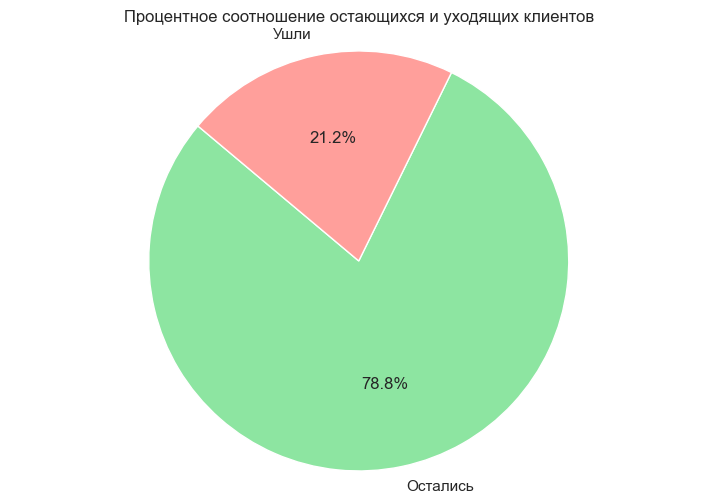

In [26]:
colors = sns.color_palette('pastel')[2:4]
plt.pie(train_df['Exited'].value_counts(),
        labels=['Остались', 'Ушли'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Процентное соотношение остающихся и уходящих клиентов')
plt.axis('equal')
plt.show()

В наборе данных явно присутствует дисбаланс классов. Это может быть проблемой, потому что модель плохо научиться распознавать второй класс. Это решается с помощью методов балансировки, таких как оверсэмплинг, либо можно уменьшить вес класса в котором больше наблюдений.

### Распределение возраста в зависимости от пола и таргета

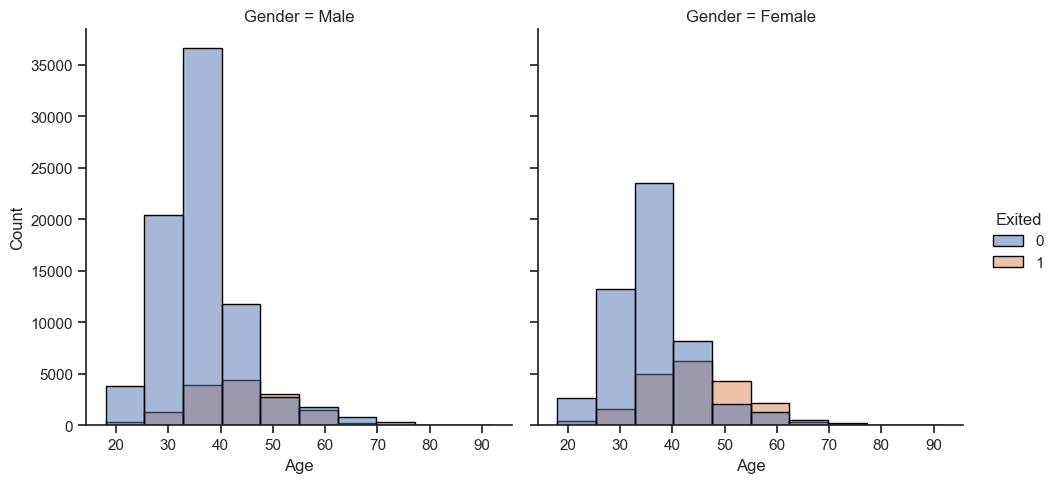

In [27]:
sns.displot(train_df,
           x = 'Age',
           col = 'Gender',
           hue = 'Exited',
           bins= 10,
           edgecolor='black')
plt.show()

### Столбчатая диаграмма таргета в зависимости от кол-ва продуктов, которыми владеет клиент

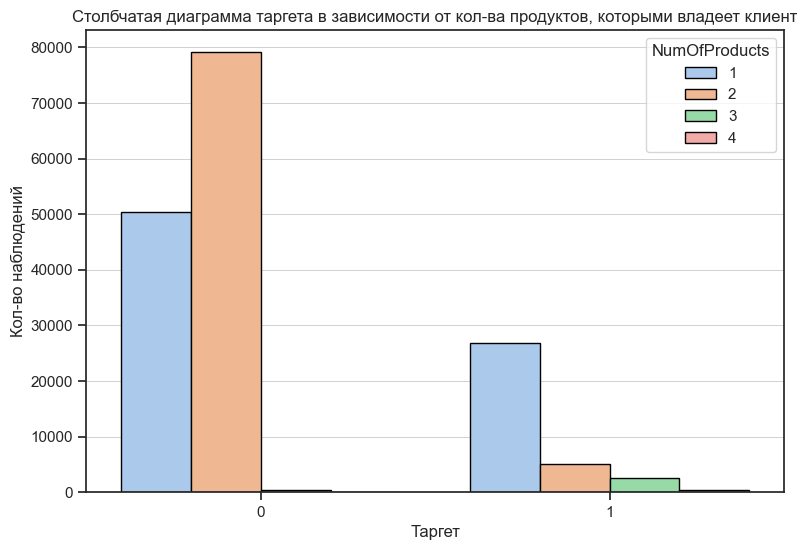

In [28]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Exited',
              hue='NumOfProducts',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Таргет')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма таргета в зависимости от кол-ва продуктов, которыми владеет клиент')
plt.show()

Исходя из графика, можно сделать вывод, что большая часть клиентов владеет 2 и меньше продуктами банка. Кроме того, почти все клиенты, которые ушли, владеют только одним продуктом.

### Столбчатая диаграмма таргета в зависимости от того, является ли клиент активным пользователем услуг

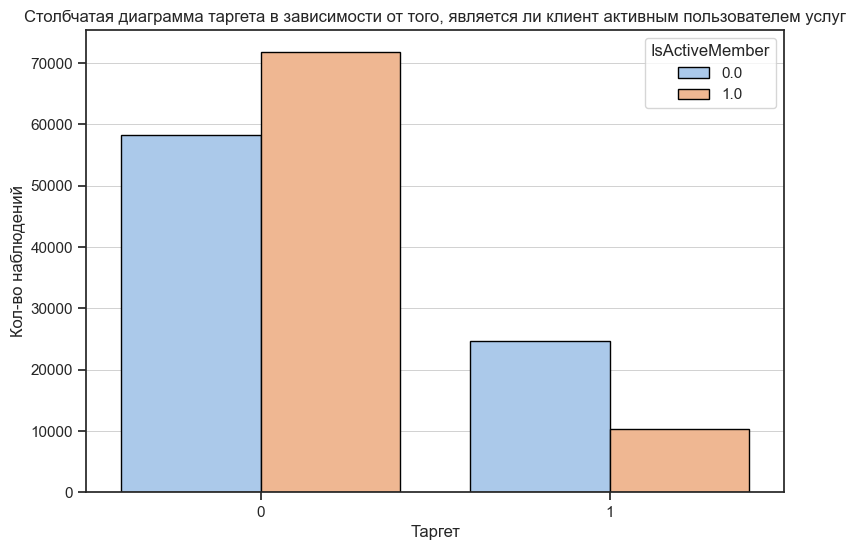

In [29]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Exited',
              hue='IsActiveMember',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Таргет')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма таргета в зависимости от того, является ли клиент активным пользователем услуг')
plt.show()

- Примерно 55% клиентов которые остались являются активными пользователями услуг банка
- Большая часть тех, кто ушел, наоборот не являются активными пользователями

### Столбчатая диаграмма таргета в зависимости от того, есть ли у клиента кредитная карта

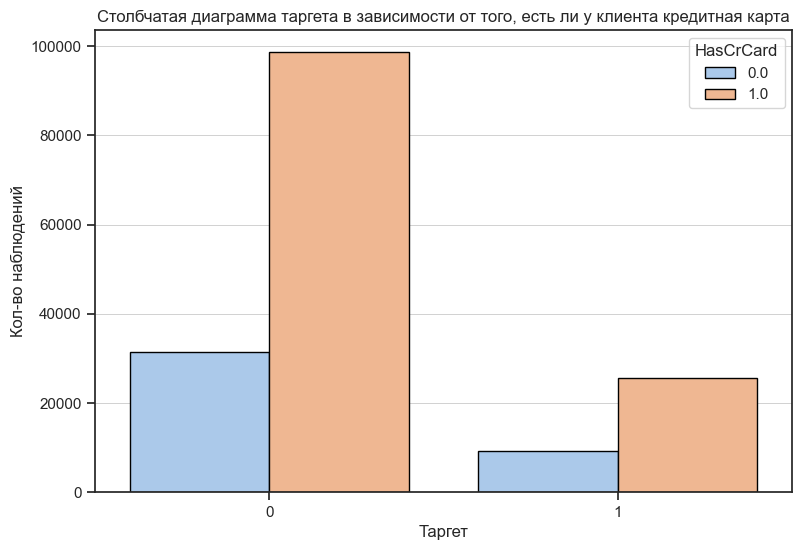

In [30]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
            x='Exited',
            hue='HasCrCard',
            palette = "pastel",
            edgecolor='black')
plt.xlabel('Таргет')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма таргета в зависимости от того, есть ли у клиента кредитная карта')
plt.show()

- Большая часть оставшихся и ушедших клиентов имеют кредитную карту

## Feature engineering

Можно попробовать создать новые признаки, на основе имеющихся и посмотреть на результат. Возможно, их можно будет включить в исследование.

### Создание признака IsActiveByCrCard

In [31]:
train_df['IsActiveByCrCard'] = train_df['HasCrCard'] * train_df['IsActiveMember']

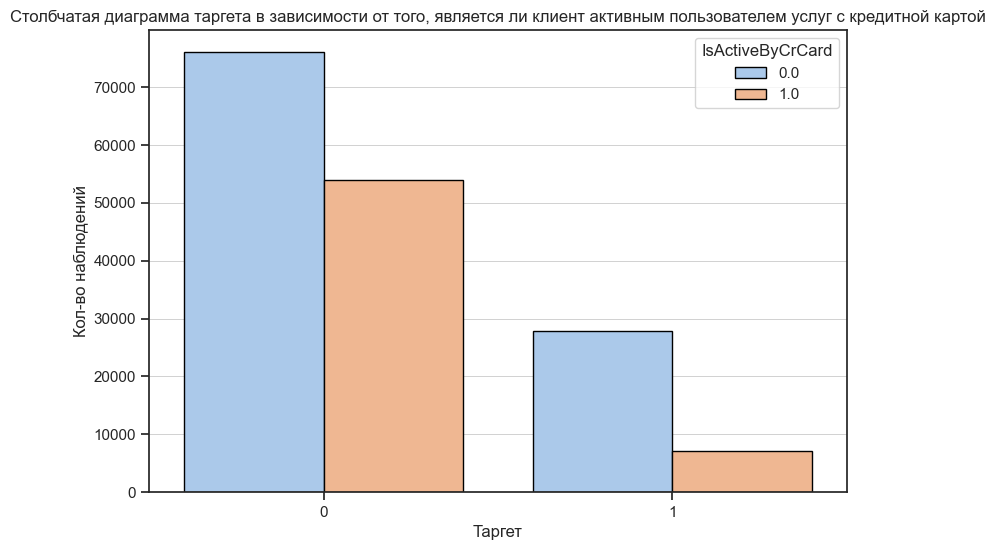

In [32]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
            x='Exited',
            hue='IsActiveByCrCard',
            palette = "pastel",
            edgecolor='black')
plt.xlabel('Таргет')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма таргета в зависимости от того, является ли клиент активным пользователем услуг с кредитной картой')
plt.show()

Вот это уже более репрезентативно: видно, что большая часть клиентов, которые активны и и имеют кредитную карту, остались. Этот признак может быть полезен при дальнейшем построении модели.

### Создание признака TenureAgeRatio

Посмотрим, как соотносится стаж клиента и его возраст в контексте целевой переменной.

In [33]:
train_df['TenureAgeRatio'] = train_df['Tenure'] / train_df['Age']

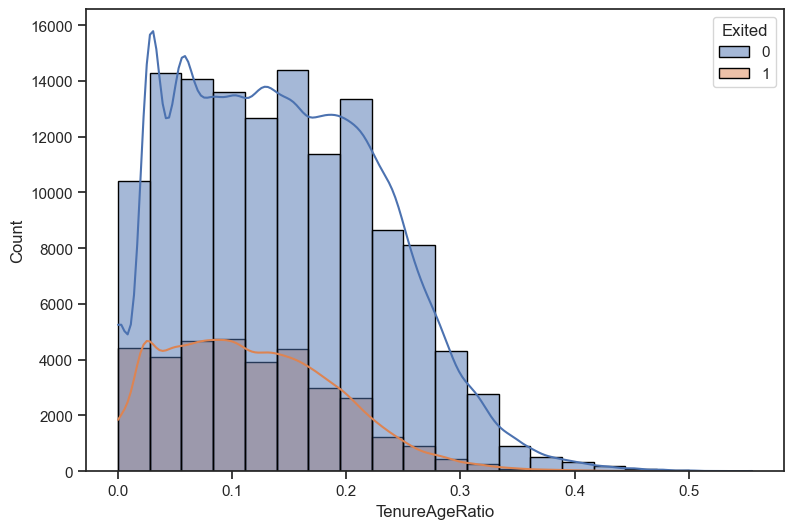

In [34]:
sns.histplot(data=train_df,
             x='TenureAgeRatio',
             hue='Exited',
             bins=20,
             kde=True,
             edgecolor='black')
plt.show()

Как видно, при высоких значениях признака отток значительно уменьшается. Данная переменная так же может быть полезна в исследовании.

## Корреляционный анализ

Теперь можно построить матрицу корреляции, что бы оценить линейные взаимосвязи между признаками, как изначальными, так и созданными в ручную. Для оценки степени корреляции, использую корреляцию Пирсона. Как говорилось ранее, в данных присутствуют категориальные переменные. Что бы отобразить их зависимость их нужно закодировать. В данном случае я воспользуюсь LabelEncoding, то есть присвою каждой категории признака количественное значение.

In [35]:
le = LabelEncoder()
train_df['Geography'] = le.fit_transform(train_df['Geography'])
train_df['Gender'] = le.fit_transform(train_df['Gender'])

In [36]:
column_order = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age Group', 'IsActiveByCrCard', 'TenureAgeRatio', 'Exited']
train_df = train_df.reindex(columns=column_order)

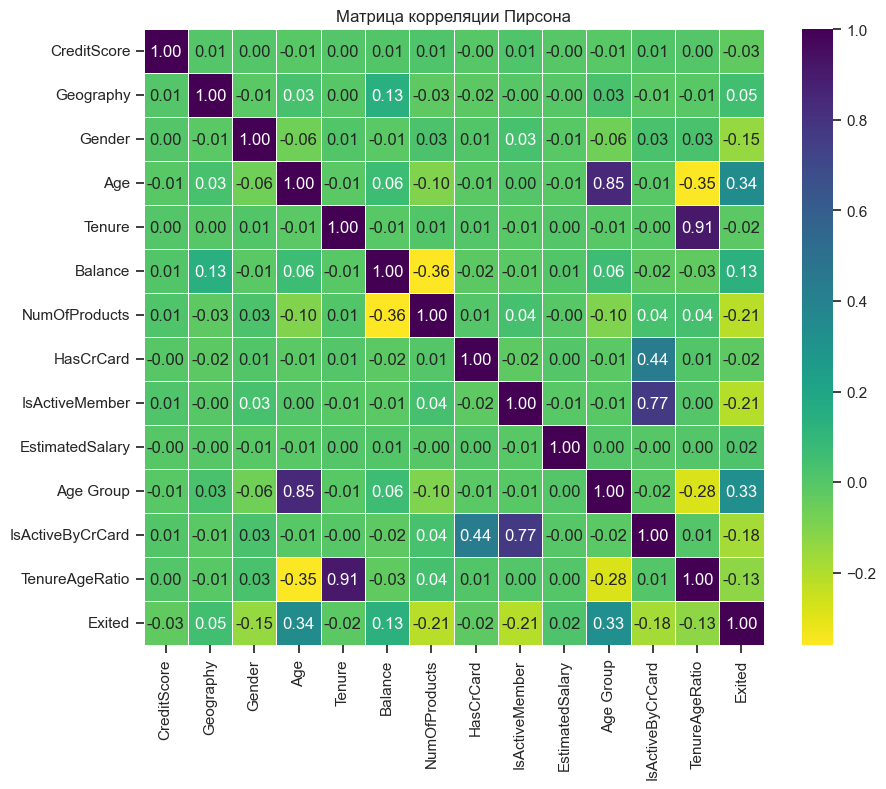

In [37]:
correlation_matrix = train_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции Пирсона')
plt.show()

**_Результаты корреляционного анализа на линейную зависимость:_**

- Почти все признаки имеют слабую взаимосвязь с таргетом('Exited');
- Коэффициент корреляции для признаков CreditScore, Geography, Tenure, HasCrCard и EstimatedSalary практически равен 0;
- Наиболее сильную взаимосвязь показывают признаки Age, NumOfProducts и IsActiveMember;
- Исскуственно созданные признаки хоть и имеют слабую взаимосвязь с целевым признаком, но все же могут быть полезны в исследовании;
- Независимые переменные в наборе данных имеют некоторую взаимосвязь, что говорит о мультиколлинеарности.